In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Make a Dataset

#### Datetime explanation:
(end_date - st_date): Subtracting st_date from end_date results in a timedelta64 object. This object represents the duration between the two dates. For example, the difference between 2025-01-01 and 2024-01-01 would be a timedelta64 representing 366 days (due to 2024 being a leap year).

.astype('timedelta64[D]'): This converts the timedelta64 object into a timedelta64 object with a resolution of days. Even though the subtraction already yielded a duration, specifying [D] ensures that the duration is explicitly expressed in terms of whole days, disregarding smaller units like hours or minutes if they were present.

.astype(int): This final conversion takes the timedelta64 object (now representing the number of days) and converts it to a standard Python integer. This provides the final integer value for the number of days in the specified range. 

In [2]:
file_name = "Consumer_data.csv"

num_records = 5000

# Generating customer ids
cust_id = np.arange(1001, 1001+num_records)

# Generating customer age
ages = np.random.randint(18, 70, size=num_records)

# Generating customer gender
gender = np.random.choice(['Male', 'Female', 'Prefer Not to say'], size=num_records)

# Generating customer product category
products = np.random.choice(['Electronics', 'Apparel', 'Home Goods', 'Books', 'Food & Beverage'], size=num_records)

# Generating customer purchase amounts
purchase_amt = np.round(np.random.uniform(10.0, 500.0, size=num_records), 2)

# Generating purchase dates
st_date = np.datetime64('2024-01-01')
end_date = np.datetime64('2025-01-01')
date_range_days = (end_date - st_date).astype('timedelta64[D]').astype(int)

purchase_date = st_date + np.random.randint(0, date_range_days, size=num_records).astype('timedelta64[D]')

In [3]:
# Creating pandas dataframe

df = pd.DataFrame({'Customer_id': cust_id,
                    'Age': ages,
                    'Gender': gender,
                    'ProductCategory': products,
                    'PurchaseAmount': purchase_amt,
                    'PurchaseDate': purchase_date})

df['PurchaseDate'] = pd.to_datetime(df['PurchaseDate'])


In [4]:
# Save to CSV
df.to_csv(file_name, index=False)

### Load CSV Data

In [5]:
csv1 = pd.read_csv(file_name)

csv1

,Customer_id,Age,Gender,ProductCategory,PurchaseAmount,PurchaseDate
0,1001,45,Female,Books,258.58,2024-07-02
1,1002,68,Male,Food & Beverage,178.63,2024-10-03
2,1003,52,Female,Home Goods,312.00,2024-04-03
3,1004,34,Male,Apparel,295.90,2024-05-19
4,1005,49,Prefer Not to say,Apparel,356.14,2024-04-25
...,...,...,...,...,...,...
4995,5996,63,Male,Home Goods,188.31,2024-10-03
4996,5997,62,Female,Food & Beverage,160.82,2024-07-01
4997,5998,36,Male,Food & Beverage,395.23,2024-01-01
4998,5999,63,Prefer Not to say,Home Goods,420.24,2024-10-01


In [6]:
# remove some random entries from PurchaseAmount column 

num_of_entries = 10
# random_state is the seed value
random_indices = csv1['PurchaseAmount'].sample(n=num_of_entries, random_state=1).index

csv1.loc[random_indices, 'PurchaseAmount'] = np.nan

In [7]:
csv1.isnull().any()

Customer_id        False
Age                False
Gender             False
ProductCategory    False
PurchaseAmount      True
PurchaseDate       False
dtype: bool

In [8]:
csv1.isnull().sum()

Customer_id         0
Age                 0
Gender              0
ProductCategory     0
PurchaseAmount     10
PurchaseDate        0
dtype: int64

In [9]:
csv1.columns

Index(['Customer_id', 'Age', 'Gender', 'ProductCategory', 'PurchaseAmount',
       'PurchaseDate'],
      dtype='object')

### Fill NAN Data

In [10]:
mean_purchase_amt = csv1['PurchaseAmount'].mean()

mean_purchase_amt

np.float64(251.81271743486977)

In [11]:
median_purchase_amt = csv1['PurchaseAmount'].median()

median_purchase_amt

np.float64(252.32999999999998)

In [12]:
mode_purchase_amt = csv1['PurchaseAmount'].mode()

mode_purchase_amt

0     27.11
1     49.60
2     79.01
3    150.03
4    166.10
5    213.37
6    327.41
7    389.43
8    434.56
Name: PurchaseAmount, dtype: float64

In [13]:
csv1['PurchaseAmount'] = csv1['PurchaseAmount'].fillna(mean_purchase_amt)

In [14]:
csv1.isnull().sum()


Customer_id        0
Age                0
Gender             0
ProductCategory    0
PurchaseAmount     0
PurchaseDate       0
dtype: int64

In [15]:
Quartile_1 = csv1['PurchaseAmount'].quantile(0.25)
Quartile_2 = csv1['PurchaseAmount'].quantile(0.50) # Median
Quartile_3 = csv1['PurchaseAmount'].quantile(0.75)

IQR = Quartile_3 - Quartile_1

print(f"Quartile_1 25% :{Quartile_1}")
print(f"Quartile_2 50% :{Quartile_2}")
print(f"Quartile_3 75% :{Quartile_3}")
print(f"\nIQR:  {IQR}")

Quartile_1 25% :127.7875
Quartile_2 50% :252.01
Quartile_3 75% :373.3275

IQR:  245.54


#### Observations:

##### 75% purchaseAmount is greater than 256.845.

##### 50% purchaseAmount is greater than 256.845 which is also the median

### Outlier Analysis

Outlier < Q1 - (IQR * 1.5)
    or 
Outlier > Q1 + (IQR * 1.5)

In [16]:
low_range = Quartile_1 - (IQR * 1.5)
high_range = Quartile_3 + (IQR * 1.5)

print("Low range:", low_range)
print("High range:", high_range)

Low range: -240.5225
High range: 741.6375


In [17]:
csv1['PurchaseAmount'].min()

np.float64(10.27)

In [18]:
csv1['PurchaseAmount'].max()

np.float64(499.89)

#### Observations:

##### There are no outliers in this data

#### Box-whiskers-plot 

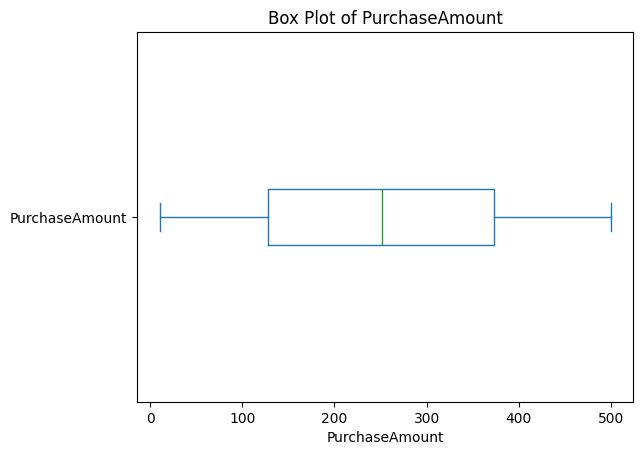

In [19]:
csv1['PurchaseAmount'].plot(kind='box', vert=False)
plt.title('Box Plot of PurchaseAmount')
plt.xlabel('PurchaseAmount')
plt.show()

#### Observations:

##### Minimum value is near by 0.
##### Maximum value is closest to 500.
##### Quartile_1 is between 100 & 200
##### Quartile_2 or median is between 200 & 300
##### Quartile_3 is between 300 & 400

#### Histogram

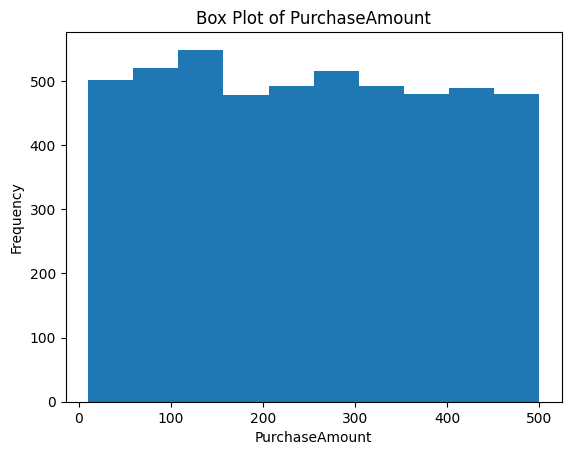

In [20]:
csv1['PurchaseAmount'].plot(kind='hist')
plt.title('Box Plot of PurchaseAmount')
plt.xlabel('PurchaseAmount')
plt.show()